In [98]:
import pandas as pd
activities_df = pd.read_csv('data/extended_activities.csv')

# Count the number of activities for each Activity Type
activity_counts = activities_df['Activity Type'].value_counts()
activity_counts

Ride    181
Run     164
Name: Activity Type, dtype: int64

In [99]:
ride_activities = activities_df[activities_df['Activity Type'] == 'Ride']

# Calculate the correlation of 'Real_duration' with other fields in the dataset
correlations = ride_activities.corr()['Moving Time']

# Display the correlations
correlations.sort_values(ascending=False)


/var/folders/pk/jkqf1fd561d112pccy3prkp80000gn/T/ipykernel_28987/2745270276.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = ride_activities.corr()['Moving Time']


Moving Time                  1.000000
Power Count                  0.998145
Elapsed Time                 0.998124
Distance                     0.982650
Total Work                   0.940714
Calories                     0.787830
Maximum Power 2.0 hr         0.717964
Relative Effort              0.575082
Maximum Power 1.5 hr         0.568730
Dirt Distance                0.560717
Elevation Gain               0.504852
Elevation Loss               0.454638
Maximum Power 1.0 hr         0.434409
Max Cadence                  0.356158
Maximum Power 5.0min         0.276267
Maximum Power 10.0min        0.265446
Maximum Power 20.0min        0.256691
Maximum Power 30.0min        0.256350
Maximum Power 1.0min         0.205385
Max Heart Rate               0.181183
Activity ID                  0.136542
Elevation High               0.134122
Average Watts                0.111471
Maximum Power 30s            0.107164
Average Grade                0.105960
Maximum Power 5s             0.102625
Max Speed   

In [100]:
run_activities = activities_df[activities_df['Activity Type'] == 'Run']

# Calculate the correlation of 'Real_duration' with other fields in the dataset
correlations = run_activities.corr()['Elapsed Time']

# Display the correlations
correlations.sort_values(ascending=False)

/var/folders/pk/jkqf1fd561d112pccy3prkp80000gn/T/ipykernel_28987/1878053028.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = run_activities.corr()['Elapsed Time']


Elapsed Time                 1.000000
Total Steps                  0.997894
Total Work                   0.993345
Power Count                  0.926406
Moving Time                  0.916310
Distance                     0.903031
Grade Adjusted Distance      0.902353
Calories                     0.886804
Maximum Power 1.5 hr         0.783760
Relative Effort              0.663955
Maximum Power 1.0 hr         0.653349
Maximum Power 2.0 hr         0.642952
Max Heart Rate               0.344407
Average Heart Rate           0.258293
Maximum Power 30.0min        0.256223
Average Cadence              0.234338
Maximum Power 20.0min        0.230102
Maximum Power 10.0min        0.190652
Maximum Power 5.0min         0.156156
Average Grade                0.132645
Elevation Gain               0.111451
Elevation Loss               0.102899
Average Watts                0.090108
Weighted Average Power       0.073787
Average Speed                0.073606
Maximum Power 1.0min         0.062531
Average Temp

In [101]:
import matplotlib.pyplot as plt

def plot_results(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Real_duration')
    plt.ylabel('Predicted Real_duration')
    plt.title('Actual vs Predicted Real_duration: {}'.format(model_name))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
    plt.show()

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Lowest RMSE found:  905.0368494808442
Best SVR model:  RandomForestRegressor(min_samples_leaf=2, n_estimators=10, random_state=42)
MSE = 321419.561594446
RMSE = 566.9387635313412


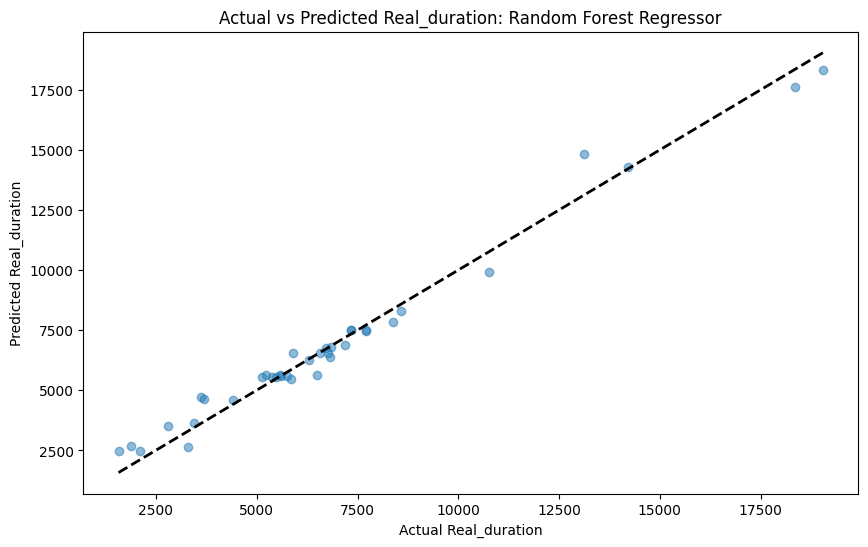

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Preparing the data for the model

# Remove non-numeric data for Random Forest Regressor
data = ride_activities.select_dtypes(include=[np.number])
data = data.fillna(0)

# Removing the target variable 'Moving Time' from the predictors
X = data.drop(['Elapsed Time', 
               'Power Count', 
               'Moving Time',
               'Average Elapsed Speed'
               ], 
                axis=1)
y = data['Moving Time']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the random forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required at each leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))

# Print the complete configuration of the best SVR model
print("Best SVR model: ", grid_search.best_estimator_)

# Predicting on the test set with the best estimator
y_pred = best_rf.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print (f'MSE = {mse}')
print (f'RMSE = {np.sqrt(mse)}')

plot_results(y_test, y_pred, 'Random Forest Regressor')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Lowest RMSE found:  788.0737759540938
Best SVR model:  SVR(C=100, kernel='linear')
MSE = 168050.0241853118
RMSE = 409.93904935406164


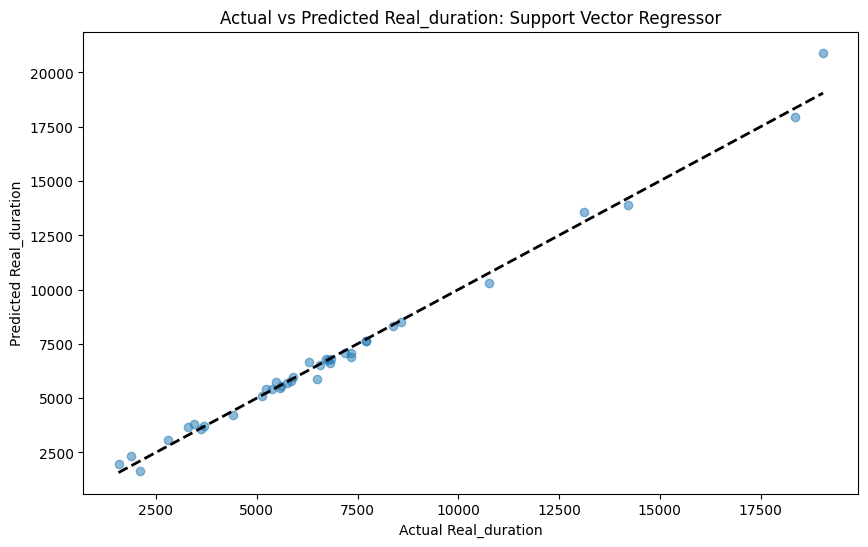

In [104]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Removing the target variable 'Moving Time' from the predictors
X = data.drop(['Elapsed Time', 
               'Power Count', 
               'Moving Time'], 
               axis=1)
y = data['Moving Time']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto'], 
    'kernel': ['linear', 'rbf', 'poly']
}

# Creating and training the random forest model
sv_model = SVR()

# Grid search with cross-validation
grid_search = GridSearchCV(sv_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best estimator
best_svr = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))

# Print the complete configuration of the best SVR model
print("Best SVR model: ", grid_search.best_estimator_)

# Predicting on the test set with the best estimator
y_pred = best_svr.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print (f'MSE = {mse}')
print (f'RMSE = {np.sqrt(mse)}')

plot_results(y_test, y_pred, 'Support Vector Regressor')

MSE = 103247.92154255812
RMSE = 321.3221460505922


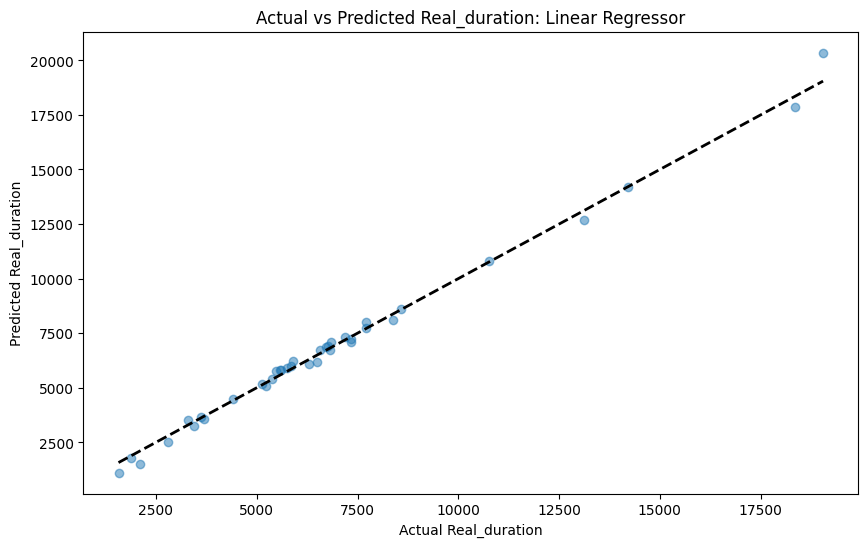

In [106]:
from sklearn.linear_model import LinearRegression

# Removing the target variable 'Moving Time' from the predictors
X = data.drop(['Elapsed Time', 
               'Power Count', 
               'Moving Time'], 
               axis=1)
y = data['Moving Time']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Calculating the Mean Squared Error for the linear regression model
mse = mean_squared_error(y_test, y_pred)
print (f'MSE = {mse}')
print (f'RMSE = {np.sqrt(mse)}')

plot_results(y_test, y_pred, 'Linear Regressor')

Epoch [500/5000], Loss: 1,037,897.50
Epoch [1000/5000], Loss: 108,545.41
Epoch [1500/5000], Loss: 44,170.35
Epoch [2000/5000], Loss: 15,278.31
Epoch [2500/5000], Loss: 8,782.03
Epoch [3000/5000], Loss: 5,359.79
Epoch [3500/5000], Loss: 4,004.81
Epoch [4000/5000], Loss: 913.89
Epoch [4500/5000], Loss: 1,669.03
Epoch [5000/5000], Loss: 1,049.80


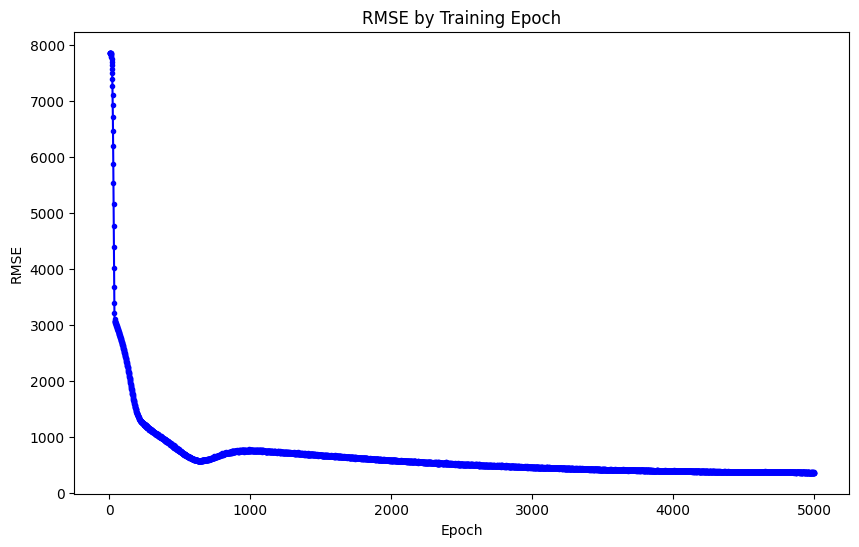

MSE = 130378.703125
RMSE = 361.0799255371094


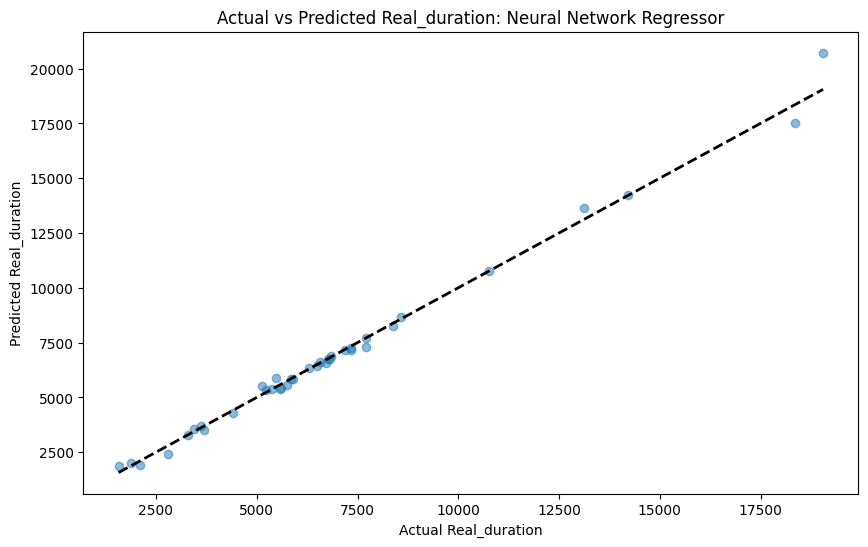

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim

class CyclingDurationPredictor(nn.Module):
    def __init__(self, input_size):
        super(CyclingDurationPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Input layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)         # Hidden layer 1
        self.fc3 = nn.Linear(64, 32)          # Hidden layer 2
        #self.fc4 = nn.Linear(32, 16)          # Hidden layer 2        
        self.fc5 = nn.Linear(32, 1)           # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        #x = self.fc4(x)
        #x = self.relu(x)
        x = self.fc5(x)
        return x


# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert the features and labels to PyTorch tensors
X_tensor = torch.Tensor(X_normalized)
y_tensor = torch.Tensor(y.values)

# Reshape y_tensor to make it two-dimensional (n_samples, 1)
y_tensor = y_tensor.view(y_tensor.shape[0], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

model = CyclingDurationPredictor(X.shape[1])

# Define a loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Number of epochs
num_epochs = 5000

# Convert the training and testing sets to tensor datasets
train_data = torch.utils.data.TensorDataset(X_train, y_train)
test_data = torch.utils.data.TensorDataset(X_test, y_test)

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=32, shuffle=False)

# List to store RMSE of each epoch
rmse_values = []  

# Training the model
for epoch in range(num_epochs):
    model.train()
    for features, labels in train_loader:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on test data
    model.eval() 
    with torch.no_grad():
        y_pred = model(X_test).view(-1)
        mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)  # Store RMSE for this epoch

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():,.2f}')

# Plot RMSE against epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), rmse_values, marker='.', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE by Training Epoch')
plt.show()

# Evaluation on test data
model.eval() 
with torch.no_grad():
    y_pred = model(X_test).view(-1)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print (f'MSE = {mse}')
print (f'RMSE = {np.sqrt(mse)}')

plot_results(y_test, y_pred, 'Neural Network Regressor')


/opt/homebrew/Caskroom/miniforge/base/envs/py39tf/lib/python3.9/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)


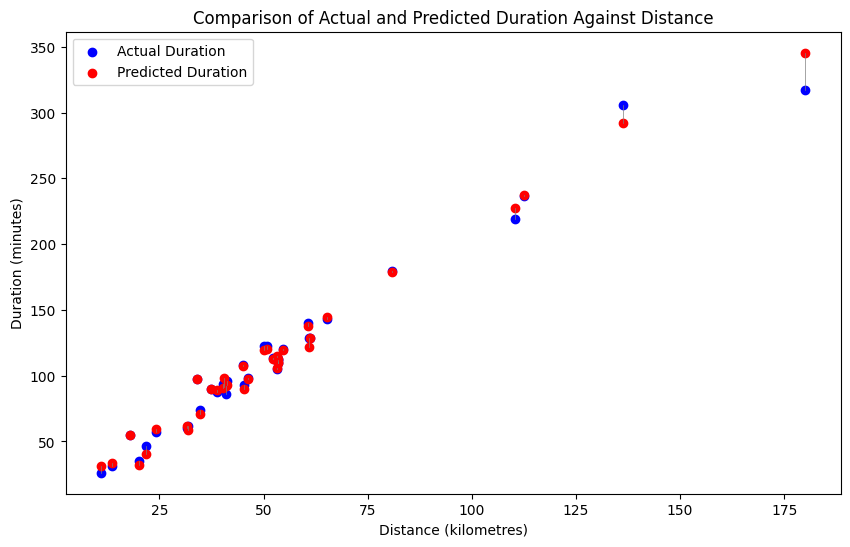

In [130]:
import matplotlib.pyplot as plt
import torch

field = 'Distance'
units = '(kilometres)'

plt.figure(figsize=(10, 6))

column_index = X.columns.get_loc(field)

# Inverse transform the normalized test set
X_test_inverse = scaler.inverse_transform(X_test.numpy())

# Extract the non-normalized values of the desired column
values = X_test_inverse[:, column_index]

# Convert y_test and y_pred from seconds to minutes
y_test_minutes = y_test / 60
y_pred_minutes = y_pred / 60

# Scatter plot of actual values against distance in blue
plt.scatter(values, y_test_minutes, color='blue', label='Actual Duration')

# Scatter plot of predicted values against distance in red
plt.scatter(values, y_pred_minutes, color='red', label='Predicted Duration')

# Drawing a line between actual and predicted for each point
for d, actual, predicted in zip(values, y_test_minutes, y_pred_minutes):
    plt.plot([d, d], [actual, predicted], color='grey', lw=0.5)  # Line from actual to predicted

plt.xlabel(field + ' ' + units)
plt.ylabel('Duration (minutes)')
plt.title(f'Comparison of Actual and Predicted Duration Against {field}')
plt.legend()
plt.show()


In [133]:
# Print average for y_pred and y_test
print (f'Average predicted duration = {y_pred.mean()}')
print (f'Average actual duration = {y_test.mean()}')

# Print number of test cases
print (f'Number of test cases = {len(y_test)}')

# Print average difference in seconds per ride
print (f'Average difference in seconds per ride = {abs(y_pred.mean() - y_test.mean())}')

Average predicted duration = 6852.1953125
Average actual duration = 6837.89208984375
Number of test cases = 37
Average difference in seconds per ride = 14.30322265625
